<a href="https://colab.research.google.com/github/chetankandula/heart_diease_prediction/blob/main/heart_diease_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn


In [79]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [80]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [81]:
df['Heart Disease'] = df['Heart Disease'].replace({'Presence':0,'Absence':1})


In [82]:
df.sample(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
245,60,1,4,130,253,0,0,144,1,1.4,1,1,7,0
69,47,1,3,108,243,0,0,152,0,0.0,1,0,3,0
102,49,0,4,130,269,0,0,163,0,0.0,1,0,3,1
118,66,0,1,150,226,0,0,114,0,2.6,3,0,3,1
34,50,1,4,144,200,0,2,126,1,0.9,2,0,7,0
120,49,1,3,120,188,0,0,139,0,2.0,2,3,7,0
179,50,1,3,129,196,0,0,163,0,0.0,1,0,3,1
35,48,1,4,130,256,1,2,150,1,0.0,1,2,7,0
195,55,0,2,135,250,0,2,161,0,1.4,2,0,3,1
27,51,0,3,120,295,0,2,157,0,0.6,1,0,3,1


In [83]:
#Splitting the data
X = df.iloc[: ,:-1]
y = df.iloc[: , -1]



In [84]:
# prompt: convert y into 2-d without changing the data

y = y.values.reshape(-1, 1)


In [85]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [86]:
y.size

270

In [87]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


Age                       -0.212322
Sex                       -0.297721
Chest pain type           -0.417436
BP                        -0.155383
Cholesterol               -0.118021
FBS over 120               0.016319
EKG results               -0.182091
Max HR                     0.418514
Exercise angina           -0.419303
ST depression             -0.417967
Slope of ST               -0.337616
Number of vessels fluro   -0.455336
Thallium                  -0.525020
Name: Heart Disease, dtype: float64


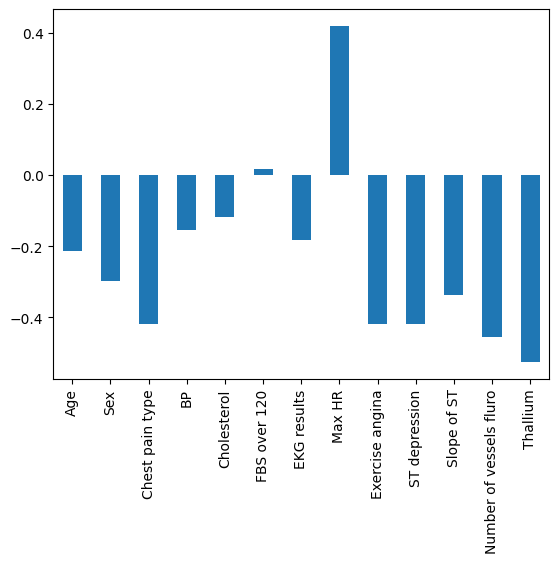

In [88]:

correlations = df.corr()['Heart Disease'].drop('Heart Disease')
print(correlations)
correlations.plot(kind='bar')
plt.show()


<Axes: >

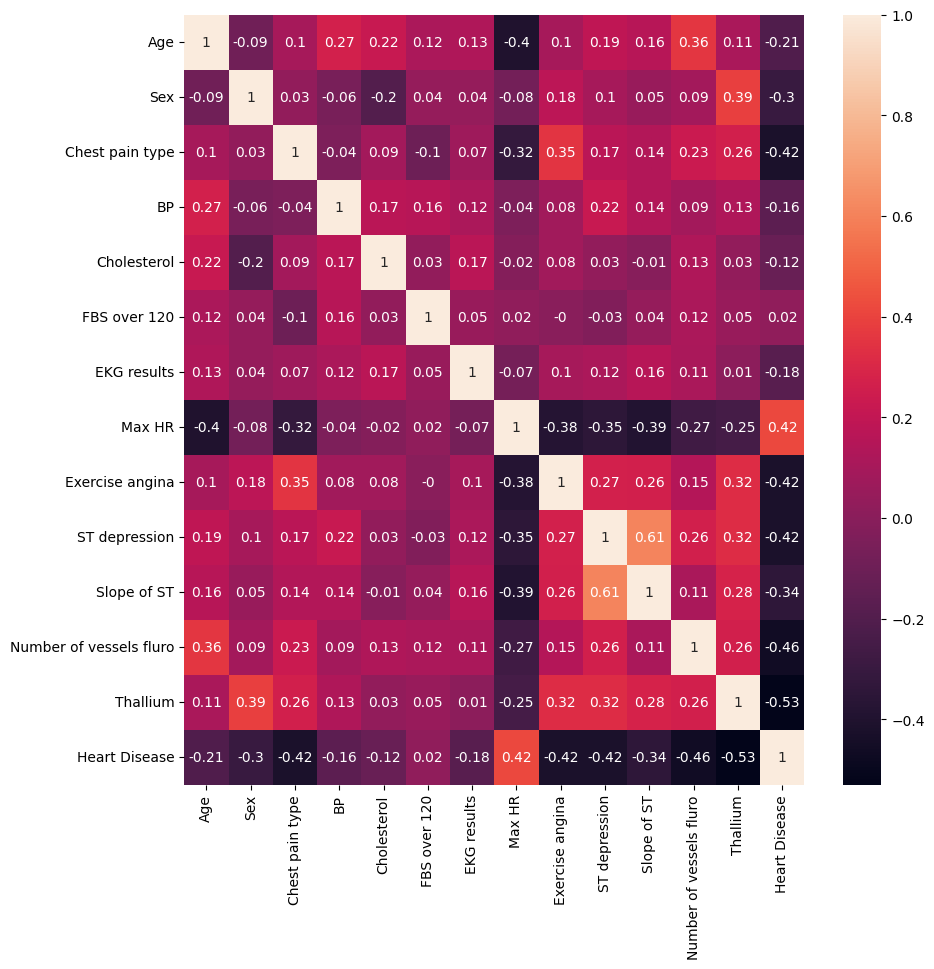

In [89]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(round(df.corr(),2), annot=True)

In [90]:
X.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

<Axes: xlabel='Cholesterol'>

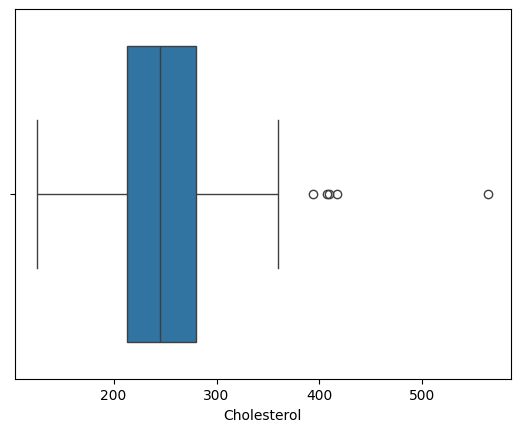

In [91]:
sns.boxplot(x = df['Cholesterol'])

<Axes: xlabel='BP'>

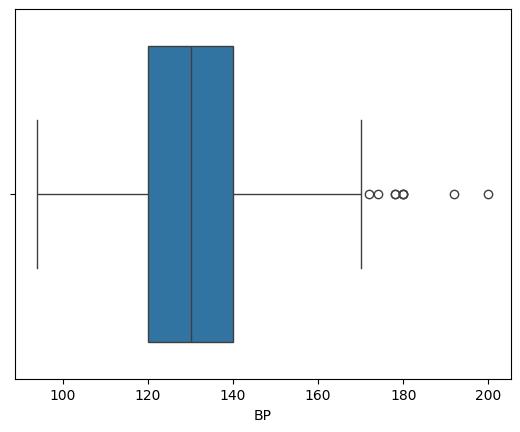

In [92]:
sns.boxplot(x = df['BP'])

<Axes: >

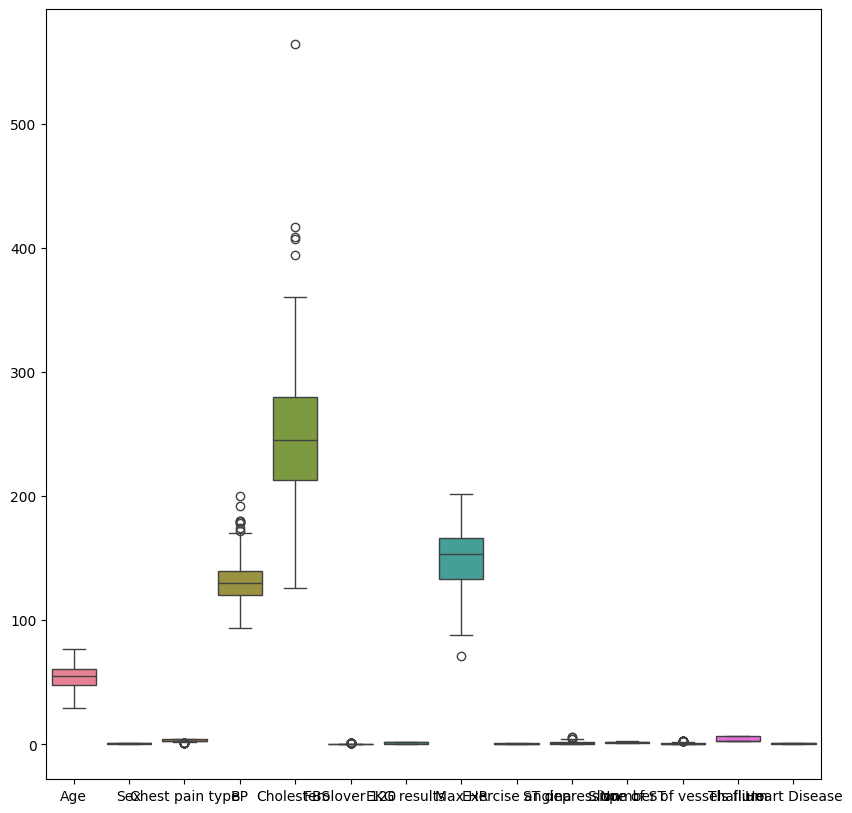

In [93]:
plt.figure(figsize=(10,10))

sns.boxplot(df)


In [94]:
#removing outliers from the data using capping
#cholestral
df['Cholesterol'] = np.where(df['Cholesterol']>400,400,df['Cholesterol'])
df['BP'] = np.where(df['BP']>250,250,df['BP'])

<Axes: xlabel='Cholesterol'>

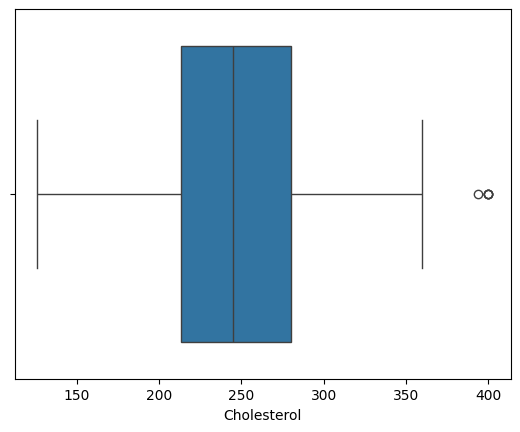

In [95]:
sns.boxplot(x = df['Cholesterol'])


In [96]:
from sklearn.model_selection import train_test_split

<Axes: xlabel='BP'>

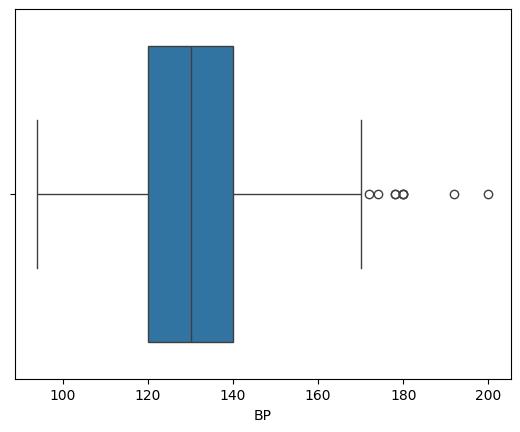

In [97]:
sns.boxplot(x = df['BP'])

In [98]:
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2,random_state=0)

In [99]:
X_train.shape

(216, 13)

In [100]:
X_test.shape

(54, 13)

In [101]:
y_train.shape

(216, 1)

In [102]:
# prompt: train the data with all the classification algorithams and find accuracy , classification report of the all training data

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train.ravel())
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Logistic Regression
Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.84      0.87      0.85        30

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54


Classifier: K-Nearest Neighbors
Accuracy: 0.7037037037037037
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68        24
           1       0.75      0.70      0.72        30

    accuracy                           0.70        54
   macro avg       0.70      0.70      0.70        54
weighted avg       0.71      0.70      0.70        54


Classifier: Support Vector Machine
Accuracy: 0.7407407407407407
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.54 